### Troubleshooting: Set working directory

In [ ]:
# import os 
# print("starting directory: ", os.getcwd())
# os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysis_KpiLambda")
# print("changed directory to: ", os.getcwd())
# !source /u/home/dbarton/.cshrc
# !source /group/halld/Software/build_scripts/gluex_env_jlab.csh

# import ROOT

######## figuring out what shell is being used inside this notebook #########

# Check what shell is being used:
# !echo $SHELL

# check which shell Jupyter actually spawned:
# !ps -p $$ -o comm=

# Check your default shell:
# !getent passwd $USER

# Check to see if tcsh shell is available in this session:
# !getent passwd $USER

# Envorinment variable mismatch?
# !env | grep SHELL

### Startup environment. Set global variables.  Define static cuts.

In [ ]:
# README: To use FSRoot in Jupyter Notebooks you need to be in a special container per  https://lan13005.github.io/PyAmpTools/intro.html#apptainer-usage

# STEP 1: Open a terminal on ifarm

# STEP 2: Initialize the container using this alias (defined here below)
# $ fshell ######## --> This outputs a "localhost" URL, among other things.

# STEP 3: Select your kernel in VS Code
    # Open/create your Jupyter Notebook --> Select "Open new Jupyter kernel" --> copy & paste URL from STEP 2 --> press ENTER

# Note: you can run this alias directly in a Jupyter Notebook cell with '!fshell'.  But it often crashes.  Just do it in a terminal.

# Alias definition in STEP 2:
# Add these lines to your shell configuration file (~/.cshrc for tcsh):
# alias fshell 'apptainer exec --contain --writable-tmpfs -B /w/halld-scshelf2101/home/dbarton/gluex,/scratch --env BASH_ENV=/dev/null /w/halld-scshelf2101/lng/WORK/PyAmpTools9/pyamptools.sif bash -c "source /etc/bash.bashrc; jupyter-lab --no-browser --port=8888; exec bash"'

In [1]:
import ROOT
from pyamptools import atiSetup
import os
os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysis_KpiLambda")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)
fileName = '/w/halld-scshelf2101/home/dbarton/gluex/files/data/pi0kplamb/pi0kplamb_2018-08_B4_M18_FSflat.root' # full dataset (fall 2018)
# fileName = '/w/halld-scshelf2101/home/dbarton/gluex/files/data/pi0kplamb/pi0kplamb_FSflat_2018_08.root' # smaller dataset (for testing)
treeName = 'ntFSGlueX_100000000_100001'

# USEFUL TUTORIAL: https://halldweb.jlab.org/DocDB/0055/005596/001/20220523_GlueX_AnWorkshop_Malte.pdf

# CREATING THE ROOT FILE WITH FSROOT

    # IMPORTANT: All this code depends on the using the correct indices for particles when passing values to functions.  The indices are set when 'flattening' a file by this flag: -mctag[MCExtras_MCDecayCode2_MCDecayCode1]

    # To nderstand the indices, you can use the 'flatten' command in the terminal or refer to this documentation: https://github.com/remitche66/FSRoot/blob/master/Documentation/FSRoot.pdf (pg. 8).

# FLATTENED USING:
# ifarm2401.jlab.org:dbarton> flatten -in /cache/halld/RunPeriod-2018-08/analysis/ver23/tree_pi0kplamb__B4_M18/merged/tree_pi0kplamb__B4_M18_051768.root -out pi0kplamb_FSflat_2018_08.root -mctag 0_100000000_100001

# REACTION: gamma p --> K+ pi0 Lambda
# Note: Lambda mass NOT CONSTRAINED (i.e. using flag "M" (NOT Mass constrained))

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

# DEFINE STRINGS TO PASS TO FSROOT FUNCTIONS INSTEAD OF PARTICLE INDICES (for readability):
DecayingLambda = "1"
Proton = "1a"
PiMinus = "1b"
KPlus = "2"
DecayingPi0 = "3"
Photon1 = "3a"
Photon2 = "3b"

# BASIC CUTS JUSTIN'S SURVEY
# Unused shower E, target Z, MM^2, KinFitChi^2/DOF
# Dominant background is: p pip pim pi0

# DEFINE CUTS
ROOT.FSCut.defineCut("chi2","Chi2DOF","0.0","3.0")
ROOT.FSCut.defineCut("unusedE","EnUnusedSh","0.0","0.1") # UnusedEnergy (unused "shower"? energy)
ROOT.FSCut.defineCut("unusedTracks","NumUnusedTracks<1") # No unused tracks
ROOT.FSCut.defineCut("coherentPeak","EnPB","8.2","8.8") # Coherent peak: 8.2 < E_beam < 8.8
# lambda cut
ROOT.FSCut.defineCut("constrainLambda",f"MASS({Proton},{PiMinus})","1.1","1.132", "1.08", "1.1", "1.132", "1.22")
# KShort cut

# DEFINE INVARIANT MASSES
# ROOT.FSCut.defineCut("constrainLambda","") # Start unconstrained, then try constraining Lambda
# ROOT.FSCut.defineCut("lambdaMissingMass","") # 
# ROOT.FSCut.defineCut("sigma") # cut on sigma(1385)

# TO DO, KEVIN 2/7/2025.  Some plots to start out:
# masses, momentum, chi2, RFdeltaT's, Dalitz plots, angle stuff
# plot stuff in bins of t, and DeltaE, and t - t_min
# what's the code to have a differential cross section?
# total cross section?

# TOTAL UNCERTAINTY = 
# stastical uncertainties AND
# systematic uncertainties

# CORRECTIONS:
# acceptance corrections
# efficiency corrections
# radiative corrections?

# ??? what meant by saying "need to do systematic studies"?


# what's the code to find our what waves we have, s, p, d, f
# what is the code to find out what the helicity is
# Other interesting things to look at:
# - Dalitz plot
# - 3D plots
# - 2D projections
# - 1D projections
# - 3D projections

# PLOT:
# cos_HelicityFrame vs. mass.

# sideband subtraction
# RF sideband subtraction

# combinatorics

# IS THIS WHAT'S KNOWN AS STATISTICAL UNCERTAINTY?
# hybrid method (bestChi2 and?)
# kinematic fit?

# LAMBDA MISSING MASS
# lambda missing mass
# lambda missing mass squared

# time of flight cut

# ??? How does the kinematic fit work?
# ??? how does the calorimeter work?  Like what is measured?  outgoing photons, electrons?

# what is the "physical" thing we learn from poles, ie. the imaginary part of some amplitude?
# what is an Argand plot?

# TO ADD TOGETHER A BUNCH OF ROOT FILES:
# vim /work/halld/home/ksaldan/fcal_timing/runDSelector.py
# vim /work/halld/home/ksaldan/fcal_timing/run_DSelector_TEMPLATE.sh

#  2/21/2025 CM notes:

# 



Welcome to JupyROOT 6.28/06
atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias FSFitFunctio

### List contents of ROOT file

In [ ]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(fileName)


### Chi2/DOF - 2D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, "Chi2DOF:Event", "(60,0.0,155000000.0,60,0.0,10.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_Chi2DOF-Event'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 1D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "Chi2DOF", "(60,0.0,16.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_Chi2DOF'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $K^{+} \pi^{0}$ (can be $K^{*}$)

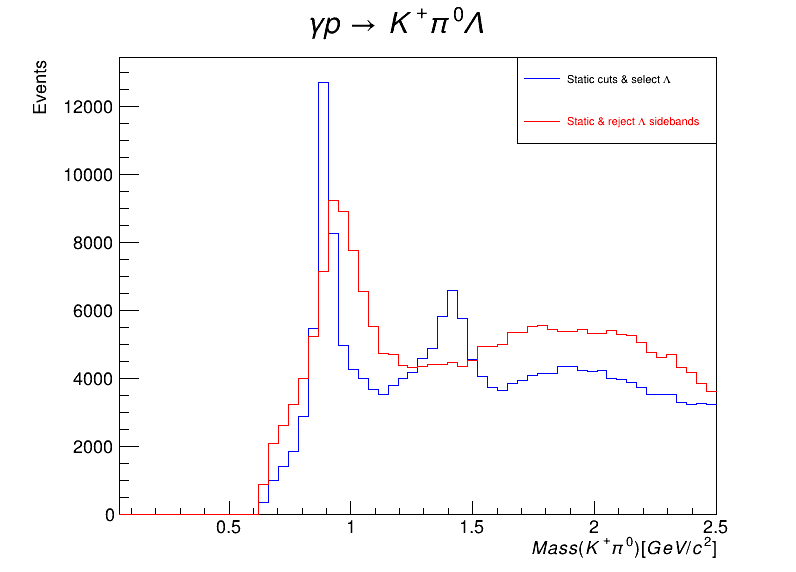

    CREATING HISTOGRAM... FSRootHist:000014   OKAY           (entries = 465065)
    CREATING HISTOGRAM... FSRootHist:000015   OKAY           (entries = 216305)
    CREATING HISTOGRAM... FSRootHist:000016   OKAY           (entries = 248491)


Info in <TCanvas::Print>: pdf file plots/pi0kplamb_kpPi0_m.pdf has been created
Info in <TCanvas::Print>: png file plots/pi0kplamb_kpPi0_m.png has been created


In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K^{+} \pi^{0} \Lambda'
axisLabel = 'Mass (K^{+} \pi^{0})'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    # Clear cache when re-plotting/scaling/etc.
    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0})", "(60, 0.05, 2.5)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0})", "(60, 0.05, 2.5)", "CUT(chi2,unusedE,unusedTracks,coherentPeak,constrainLambda)")
    h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0})", "(60, 0.05, 2.5)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    # h1.Scale(100)

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(7) # set line type to dashed
    # h2.SetLineWidth(2)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')
    # h2.Scale(2)

    h3.SetTitle("")
    h3.SetTitle(plotTitle)
    h3.SetStats(False)
    h3.SetLineColor(ROOT.kRed)
    h3.SetLineStyle(1)
    # h3.SetLineWidth(2)
    h3.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h3.GetYaxis().SetTitle('Events')

    # h1.Draw('hist')
    h2.Draw('hist')
    h3.Draw('hist, same')

    legend1 = ROOT.TLegend(0.65, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, 'Static cuts only', 'l')
    legend1.AddEntry(h2, 'Static cuts & select #Lambda', 'l')
    legend1.AddEntry(h3, 'Static & reject #Lambda sidebands', 'l').SetTextColor(ROOT.kRed)
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kpPi0_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $\pi^{0}$: Mass ($\gamma_{1}$ $\gamma_{2}$)

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\pi^{0}: Mass (\gamma_{1} \gamma_{2})'
axisLabel = '\pi^{0}: Mass (\gamma_{1} \gamma_{2})'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    print("Photon1: ", Photon1)
    print("Photon2: ", Photon2)
    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Photon1}, {Photon2})", "(80, 0.1, 0.2)", "")
    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingPi0})", "(80, 0.1, 0.2)", "")
    
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_Pi0_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $\gamma_{1}$ energy

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Energy (\gamma_{1})'
plot2Title = 'Momentum (\gamma_{1})'
axisLabel = '(\gamma_{1})'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"ENERGY({Photon1})", "(80, 0.0, 14.0)", "")
    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MOMENTUM({Photon1})", "(80, 0.0, 14.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_photon1_E'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $\gamma_{2}$ energy

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Energy (\gamma_{2})'
plot2Title = 'Momentum (\gamma_{2})'
axisLabel = '(\gamma_{2})'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.], not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"ENERGY({Photon2})", "(80, 0.0, 14.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_photon2_E'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $\Lambda$:   Mass(proton $\pi^{-}$)

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\Lambda: Mass (Proton \pi^{-})'
axisLabel = 'Mass (Proton \pi^{-})'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus})", "(60, 1.099, 1.133)", "")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus})", "(60, 1.099, 1.133)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")
    h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus})", "(60, 1.099, 1.133)", "CUT(chi2,unusedE,unusedTracks,coherentPeak,constrainLambda)")    

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    # h1.Scale(100)

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kBlue)
    # h2.SetLineStyle(9) # set line type to dashed
    h2.SetLineWidth(1)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')
    # h2.Scale(2)

    h3.SetTitle("")
    h3.SetTitle(plotTitle)
    h3.SetStats(False)
    h3.SetLineColor(ROOT.kRed)
    h3.SetLineStyle(1)
    h3.SetLineWidth(1)
    h3.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h3.GetYaxis().SetTitle('Events')

    # h1.Draw('hist')
    h2.Draw('hist')
    h3.Draw('same, hist')


    legend1 = ROOT.TLegend(0.65, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, axisLabel, 'l')
    legend1.AddEntry(h2, axisLabel + ' Static cuts', 'l')
    legend1.AddEntry(h3, axisLabel + ' Static cuts & select #Lambda', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_protPim_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda sidebands

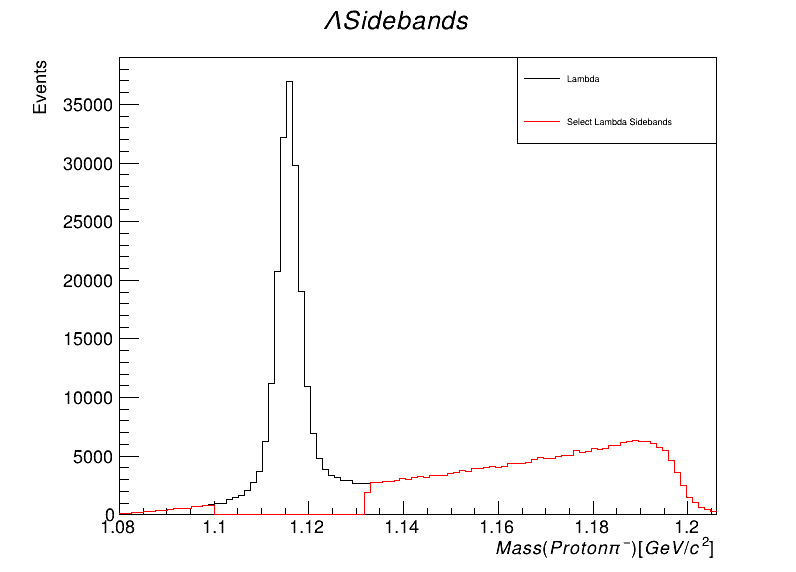

    FOUND HISTOGRAM...    FSRootHist:000005   OKAY           (entries = 465065)
    FOUND HISTOGRAM...    FSRootHist:000006   OKAY           (entries = 248491)


Info in <TCanvas::Print>: pdf file plots/pi0kplamb_protPim_LambdaSidebands_m.pdf has been created
Info in <TCanvas::Print>: png file plots/pi0kplamb_protPim_LambdaSidebands_m.png has been created


In [5]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\Lambda Sidebands'
axisLabel = 'Mass (Proton \pi^{-})'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # clear histogram cache
    # ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus})", "(100, 1.08, 1.206)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus})", "(100, 1.08, 1.206)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    h2.Draw('hist, same')

    legend1 = ROOT.TLegend(0.65, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'Lambda', 'l')
    legend1.AddEntry(h2,'Select Lambda Sidebands', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_protPim_LambdaSidebands_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $\Lambda$:   Missing Mass

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '#Lambda Missing Mass'
axisLabel = '#Lambda Missing Mass'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # clear histogram memory before printing the next one
    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingLambda})", "(60, 1.07, 1.35)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kMagenta)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('same, hist')


    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_decayingLambda_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Recoiling proton Mass

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Proton Mass'
axisLabel = 'Mass (proton reoil) [GeV/c^{2}]'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"ENERGY({Proton})", "(80, 0.0, 14.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_recoilingProton_M'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $\pi^{-}$ mass

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '$\pi^{-}$ Mass'
axisLabel = '$Mass (\pi^{-}) [GeV/c^{2}]$'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiMinus})", "(80, 0.1, 0.2)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_PiMinus_M'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

---
---
### 2D PLOTS
---
---

### Dalitz plot: (Lambda pi0)^2 vs (K+ pi0)^2

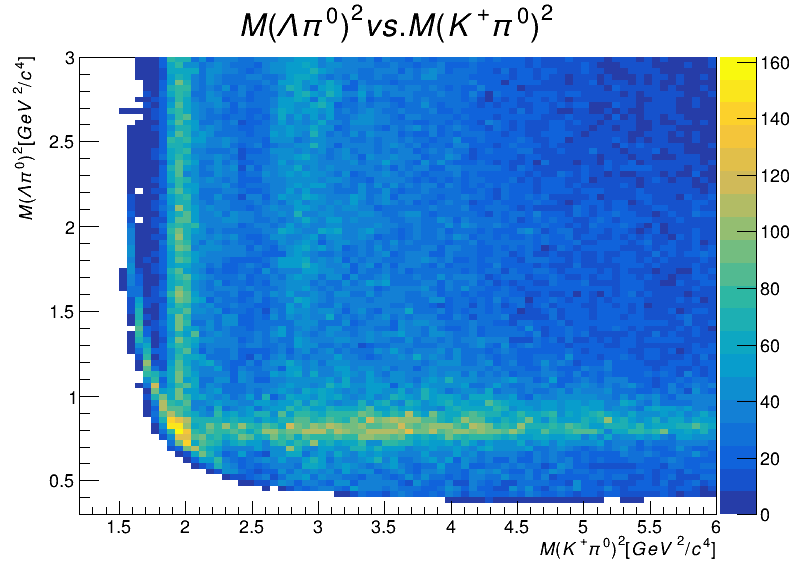

    CREATING HISTOGRAM... FSRootHist:000017   OKAY           (entries = 465065)


Info in <TCanvas::Print>: pdf file plots/pi0kplamb_kpPi0VSlambPi0.pdf has been created
Info in <TCanvas::Print>: png file plots/pi0kplamb_kpPi0VSlambPi0.png has been created


In [27]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'M(\Lambda \pi^{0})^{2} vs. M(K^{+} \pi^{0})^{2}'
XaxisLabel = 'M(K^{+} \pi^{0})^{2}'
YaxisLabel = 'M(\Lambda \pi^{0})^{2}'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({KPlus},{DecayingPi0}):MASS2({Proton},{PiMinus})", "(80, 0.0, 10.0, 80, 0.0, 10.0)", "")
    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({KPlus},{DecayingPi0}):MASS2({DecayingLambda},{DecayingPi0})", "(80, 1.2, 6.0, 80, 0.3, 3.0)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(XaxisLabel + ' [GeV^{2}/c^{4}]')
    h1.GetYaxis().SetTitle(YaxisLabel + ' [GeV^{2}/c^{4}]')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle, 'l')
    # legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kpPi0VSlambPi0'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Dalitz plot: ($p_{K^{+}} + p_{\Lambda})$ vs. ($p_{\pi^{0}} + p_{\Lambda})^{2}$

In [ ]:
from IPython.display import Image, display

plotTitle = 'Dalitz plot'
XaxisLabel = '({K^{+}} + {\Lambda})^{2}'
YaxisLabel = '({\pi^{0}} + {\Lambda})^{2}'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({KPlus},{DecayingLambda}):MASS2({DecayingPi0},{DecayingLambda})", "(80, 0.0, 21.0, 80, 0.0, 21.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(XaxisLabel + ' \ [GeV^{2}/c^{4}]')
    h1.GetYaxis().SetTitle(YaxisLabel + ' \ [GeV^{2}/c^{4}]')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kpLambVSPi0Lamb'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

---
---
### Other plots
---
---

### $K^{+}$ mass

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass (K^{+})'
axisLabel = 'Mass (K^{+})'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus})", "(60, 0.05, 2.0)", "")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus})", "(60, 0.05, 2.0)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')

    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    # h2.Draw('same, hist')

    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.AddEntry(h2, plotTitle + ' cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kp_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Beam Energy

In [ ]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e", "(80, 0.0, 14.0)", "")
h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()

h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e_measured", "(80, 0.0, 14.0)", "")
h2.SetStats(False)
h2.SetMarkerStyle(24)
h2.SetMarkerColor(ROOT.kRed)
h2.GetXaxis().SetTitle(axisLabel)
h2.GetYaxis().SetTitle('Events')
h2.Draw('p same')
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
# legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
# legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
legend1.Draw('same')

img_path = 'plots/pi0kplamb_beam_e.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

### Target proton

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Target proton mass'
axisLabel = 'Mass (target proton) [GeV/c^{2}]'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({?????})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_target_m_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Mass ($K^{+}$ $\pi^{0}$ p $\pi^{-}$)

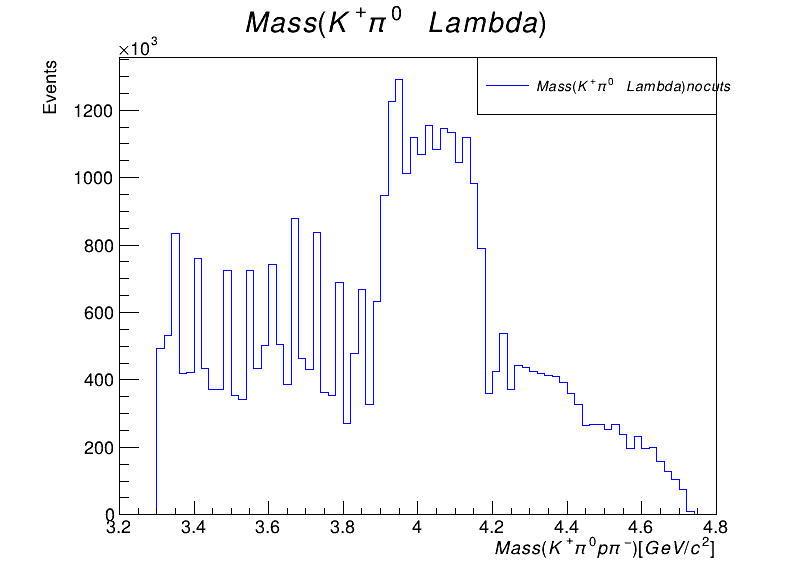

    CREATING HISTOGRAM... FSRootHist:000005   OKAY           (entries = 39059623)


Info in <TCanvas::Print>: pdf file plots/pi0kplamb_kpPi0ProtPim_m.pdf has been created
Info in <TCanvas::Print>: png file plots/pi0kplamb_kpPi0ProtPim_m.png has been created


In [9]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass (K^{+} \pi^{0} #Lambda)'
axisLabel = 'Mass (K^{+} \pi^{0} p \pi^{-})'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 3.2, 4.8)", "")

    # FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
    # h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")
    
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kpPi0ProtPim_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()